In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
returns_from_sarsa = np.load('sarsa_online_returns.npy')
returns_from_qlearning = np.load('qlearning_online_returns.npy')

In [3]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

## Learning curve / online performance

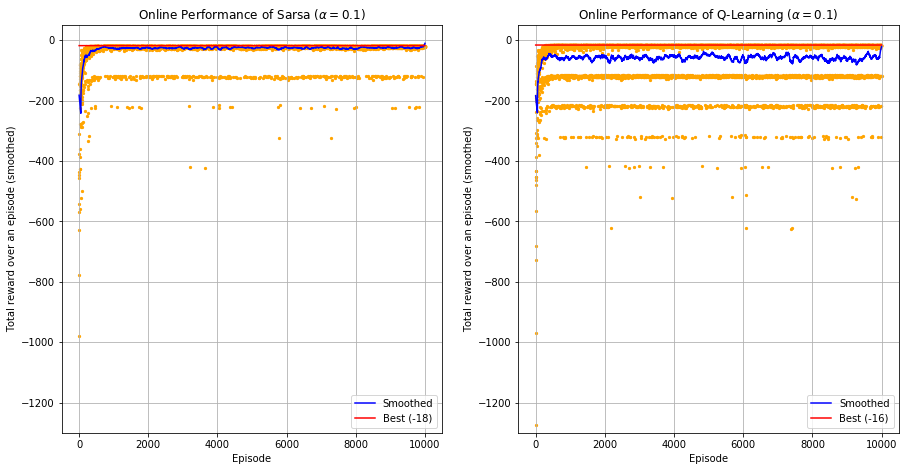

In [4]:
fig = plt.figure(figsize=(15, 7.5))

fig.add_subplot(121)

plt.scatter(np.arange(len(returns_from_sarsa)), returns_from_sarsa, s=5, alpha=1, color='orange')
plt.plot(smooth(returns_from_sarsa, 100), alpha=1, color='blue', label='Smoothed')
plt.plot([np.max(returns_from_sarsa)] * 10000, color='red', label=f'Best ({int(np.max(returns_from_sarsa))})')

plt.ylim(-1300, 50)
plt.grid()
plt.legend(loc='lower right')

plt.title(r'Online Performance of Sarsa ($\alpha=0.1$)')
plt.xlabel('Episode'); plt.ylabel('Total reward over an episode (smoothed)')

fig.add_subplot(122)

plt.scatter(np.arange(len(returns_from_qlearning)), returns_from_qlearning, s=5, alpha=1, color='orange')
plt.plot(smooth(returns_from_qlearning, 100), alpha=1, color='blue', label='Smoothed')
plt.plot([np.max(returns_from_qlearning)] * 10000, color='red', label=f'Best ({int(np.max(returns_from_qlearning))})')

plt.ylim(-1300, 50)
plt.grid()

plt.title(r'Online Performance of Q-Learning ($\alpha=0.1$)')
plt.xlabel('Episode'); plt.ylabel('Total reward over an episode (smoothed)')
plt.legend(loc='lower right')

plt.savefig('comparison.png', dpi=100, bbox_inches = 'tight', pad_inches = 0)